In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import missingno as msn

In [28]:
df = pd.read_csv('data/GlobalTemperatures.csv', parse_dates=['dt'])
df['Year'] = pd.to_datetime(df['dt']).dt.year
df['Month'] = pd.to_datetime(df['dt']).dt.month
df.set_index('dt', inplace=True)

,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty,LandAverageTemperature,Year,Month
dt,,,,,,,,,,
1750-01-01,3.574,NaN,NaN,NaN,NaN,NaN,NaN,3.034,1750,1
1750-02-01,3.702,NaN,NaN,NaN,NaN,NaN,NaN,3.083,1750,2
1750-03-01,3.076,NaN,NaN,NaN,NaN,NaN,NaN,5.626,1750,3
1750-04-01,2.451,NaN,NaN,NaN,NaN,NaN,NaN,8.490,1750,4
1750-05-01,2.072,NaN,NaN,NaN,NaN,NaN,NaN,11.573,1750,5
...,...,...,...,...,...,...,...,...,...,...
2010-04-01,0.087,15.616,0.153,3.759,0.159,16.039,0.060,9.671,2010,4
2010-05-01,0.078,18.173,0.143,6.524,0.132,16.732,0.057,12.406,2010,5
2010-06-01,0.086,20.252,0.118,8.489,0.128,17.271,0.057,14.421,2010,6


In [46]:
df.drop(columns=['LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty'], inplace=True)

In [47]:
df.head()

,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAverageTemperature,Year,Month
dt,,,,,,,,
1850-01-01,1.105,8.242,1.738,-3.206,2.822,0.749,1850,1
1850-02-01,1.275,9.970,3.007,-2.291,1.623,3.071,1850,2
1850-03-01,0.955,10.347,2.401,-1.905,1.410,4.954,1850,3
1850-04-01,0.665,12.934,1.004,1.018,1.329,7.217,1850,4
1850-05-01,0.617,15.655,2.406,3.811,1.347,10.004,1850,5


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1928 entries, 1850-01-01 to 2010-08-01
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LandAverageTemperatureUncertainty  1928 non-null   float64
 1   LandMaxTemperature                 1928 non-null   float64
 2   LandMaxTemperatureUncertainty      1928 non-null   float64
 3   LandMinTemperature                 1928 non-null   float64
 4   LandMinTemperatureUncertainty      1928 non-null   float64
 5   LandAverageTemperature             1928 non-null   float64
 6   Year                               1928 non-null   int32  
 7   Month                              1928 non-null   int32  
dtypes: float64(6), int32(2)
memory usage: 120.5 KB


In [ ]:
df.isnull().sum()

In [ ]:
msn.heatmap(df)
msn.matrix(df)

In [38]:
df.dropna(inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1928 entries, 1850-01-01 to 2010-08-01
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LandAverageTemperatureUncertainty  1928 non-null   float64
 1   LandMaxTemperature                 1928 non-null   float64
 2   LandMaxTemperatureUncertainty      1928 non-null   float64
 3   LandMinTemperature                 1928 non-null   float64
 4   LandMinTemperatureUncertainty      1928 non-null   float64
 5   LandAverageTemperature             1928 non-null   float64
 6   Year                               1928 non-null   int32  
 7   Month                              1928 non-null   int32  
dtypes: float64(6), int32(2)
memory usage: 120.5 KB


In [50]:
correlation = df.corr()

<Axes: >

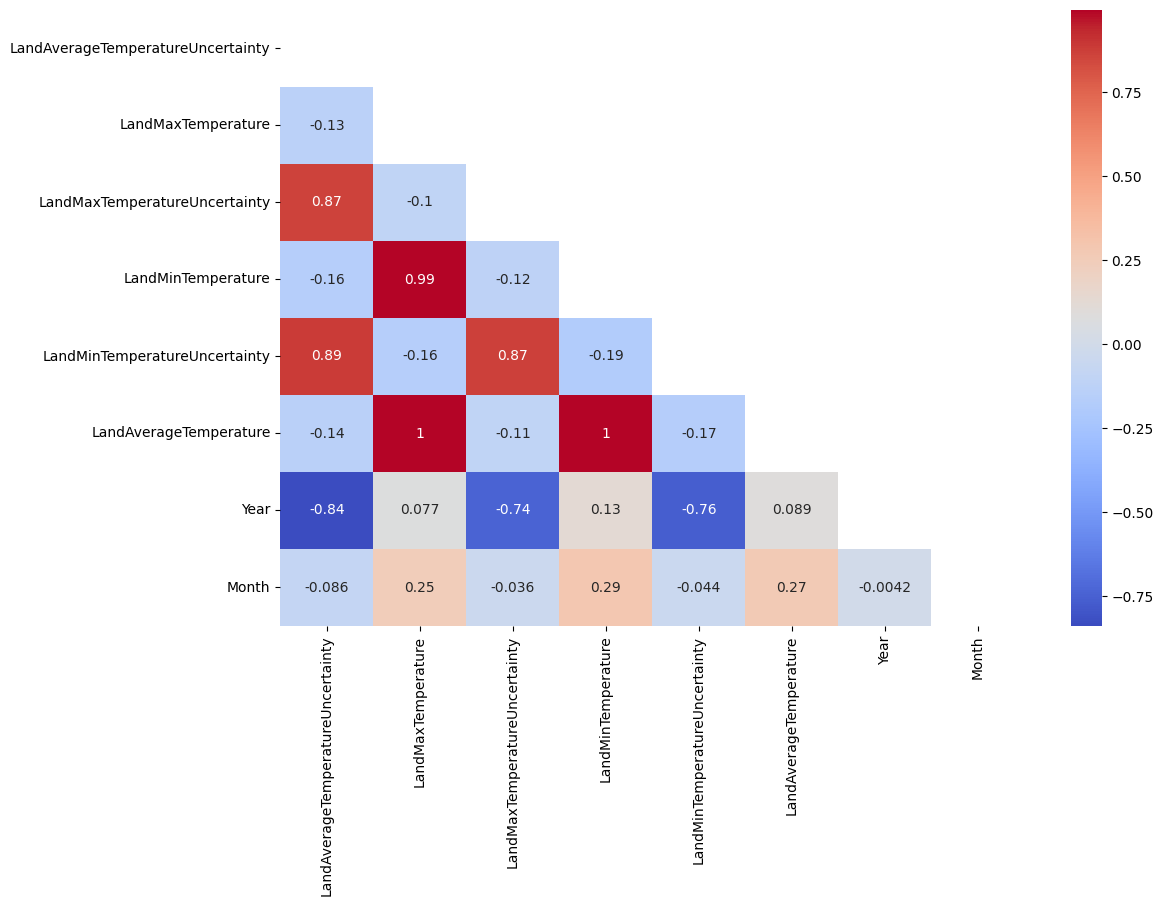

In [51]:
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation,
    annot=True,
    cmap='coolwarm',
    mask=np.triu(np.ones_like(correlation, dtype=bool))
)

In [56]:
df['lag_1'] = df['LandAverageTemperature'].shift(1)
df['lag_2'] = df['LandAverageTemperature'].shift(2)
df['lag_3'] = df['LandAverageTemperature'].shift(3)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1928 entries, 1850-01-01 to 2010-08-01
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   LandAverageTemperatureUncertainty  1928 non-null   float64
 1   LandMaxTemperature                 1928 non-null   float64
 2   LandMaxTemperatureUncertainty      1928 non-null   float64
 3   LandMinTemperature                 1928 non-null   float64
 4   LandMinTemperatureUncertainty      1928 non-null   float64
 5   LandAverageTemperature             1928 non-null   float64
 6   Year                               1928 non-null   int32  
 7   Month                              1928 non-null   int32  
 8   lag_1                              1927 non-null   float64
 9   lag_2                              1926 non-null   float64
 10  lag_3                              1925 non-null   float64
dtypes: float64(9), int32(2)
memory usage: 

In [58]:
df.dropna(inplace=True)

<Axes: >

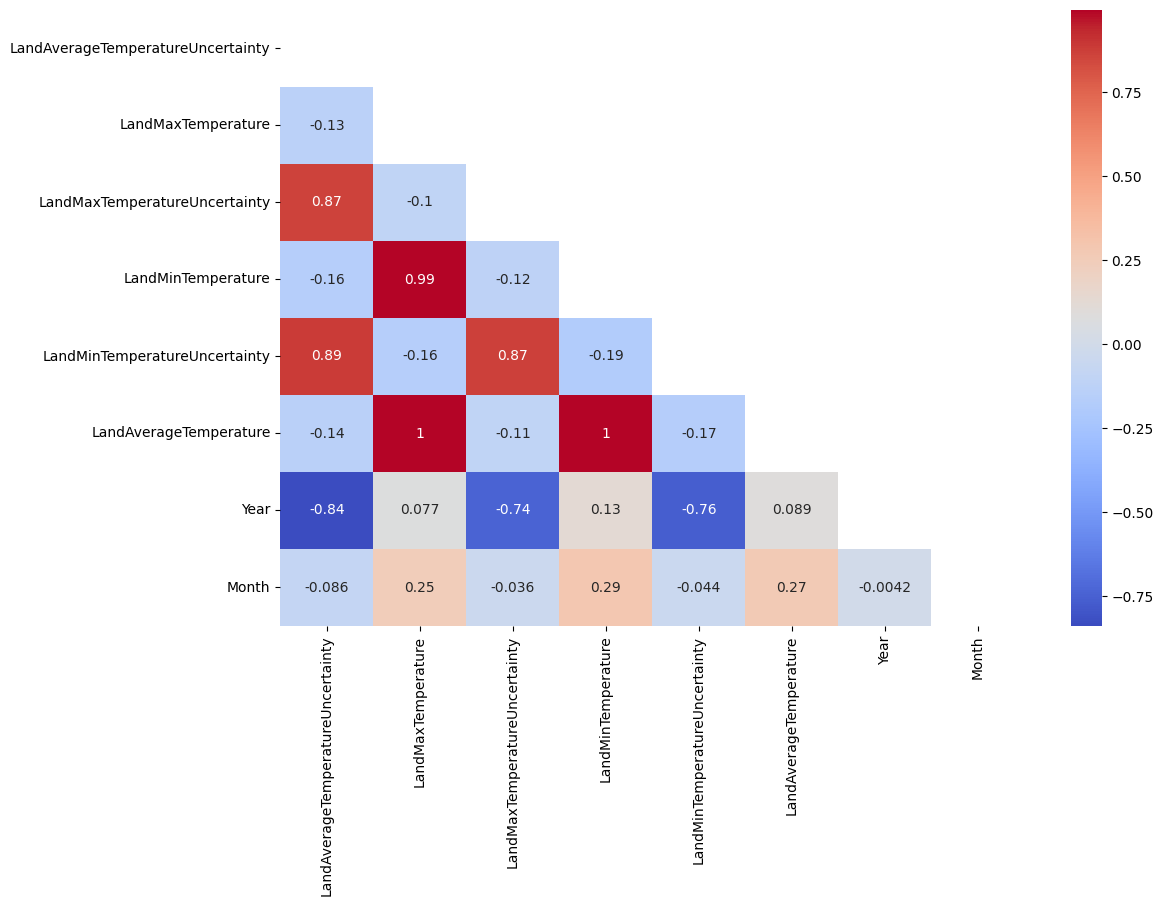

In [60]:
plt.figure(figsize=(12,8))
sns.heatmap(
    correlation,
    annot=True,
    cmap='coolwarm',
    mask=np.triu(np.ones_like(correlation, dtype=bool))
)

In [64]:
def wrangle(path):
    df = pd.read_csv('data/GlobalTemperatures.csv', parse_dates=['dt'])
    df['Year'] = pd.to_datetime(df['dt']).dt.year
    df['Month'] = pd.to_datetime(df['dt']).dt.month
    df.set_index('dt', inplace=True)
    df.dropna(inplace=True)

    cols = ['LandAndOceanAverageTemperature', 'LandAndOceanAverageTemperatureUncertainty']
    df.drop(columns=cols, inplace=True) 


    df['lag_1'] = df['LandAverageTemperature'].shift(1)
    df['lag_2'] = df['LandAverageTemperature'].shift(2)
    df['lag_3'] = df['LandAverageTemperature'].shift(3)
    df.dropna(inplace=True)